           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

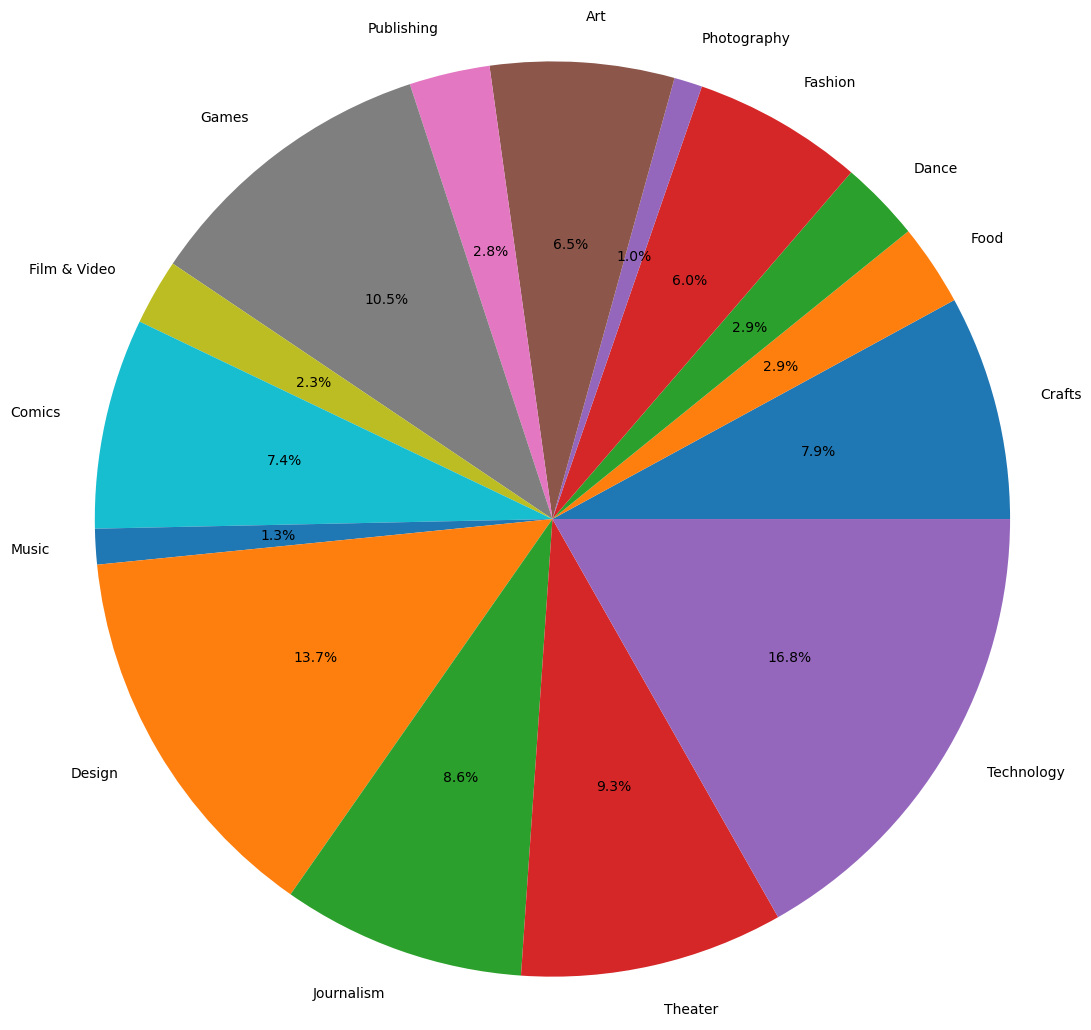

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64


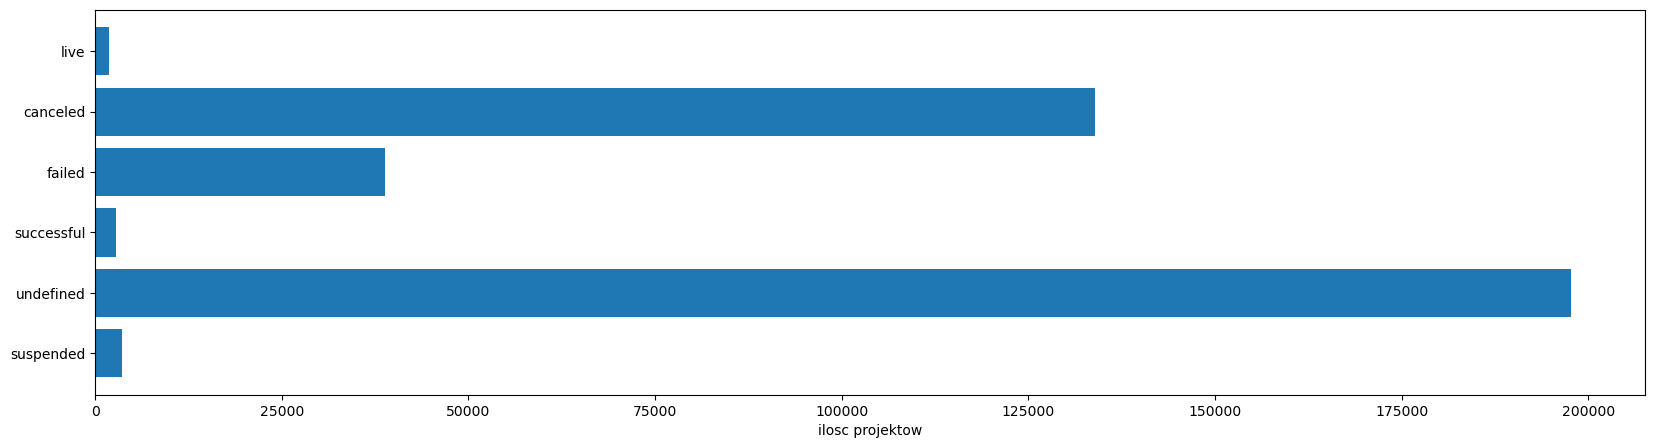

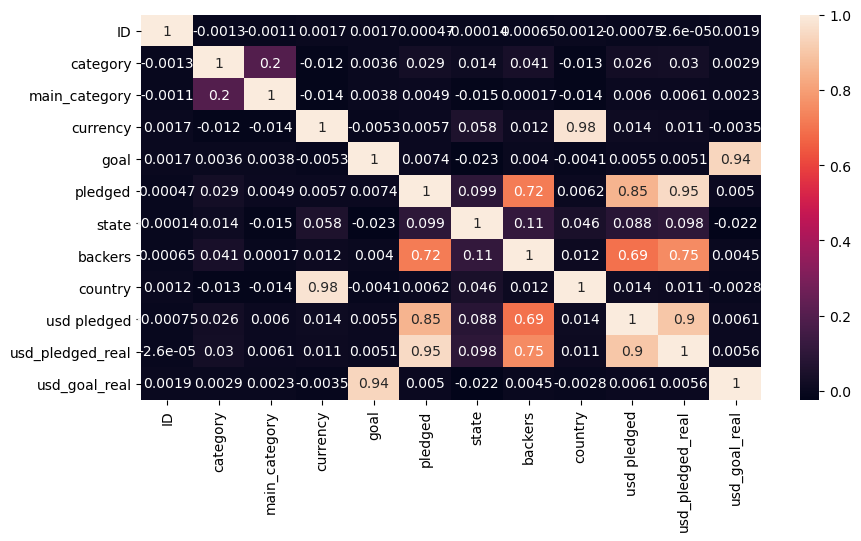

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xeant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                name  char_count
0                    The Songs of Adelaide & Abullah          31
1      Greeting From Earth: ZGAC Arts Capsule For ET          45
2                                     Where is Hank?          14
3  ToshiCapital Rekordz Needs Help to Complete Album          49
4  Community Film Project: The Art of Neighborhoo...          58
                                                name  \
0                    The Songs of Adelaide & Abullah   
1      Greeting From Earth: ZGAC Arts Capsule For ET   
2                                     Where is Hank?   
3  ToshiCapital Rekordz Needs Help to Complete Album   
4  Community Film Project: The Art of Neighborhoo...   

                                           stopwords  
0                       The Songs Adelaide & Abullah  
1      Greeting From Earth: ZGAC Arts Capsule For ET  
2                                        Where Hank?  
3     ToshiCapital Rekordz Needs Help Complete Album 

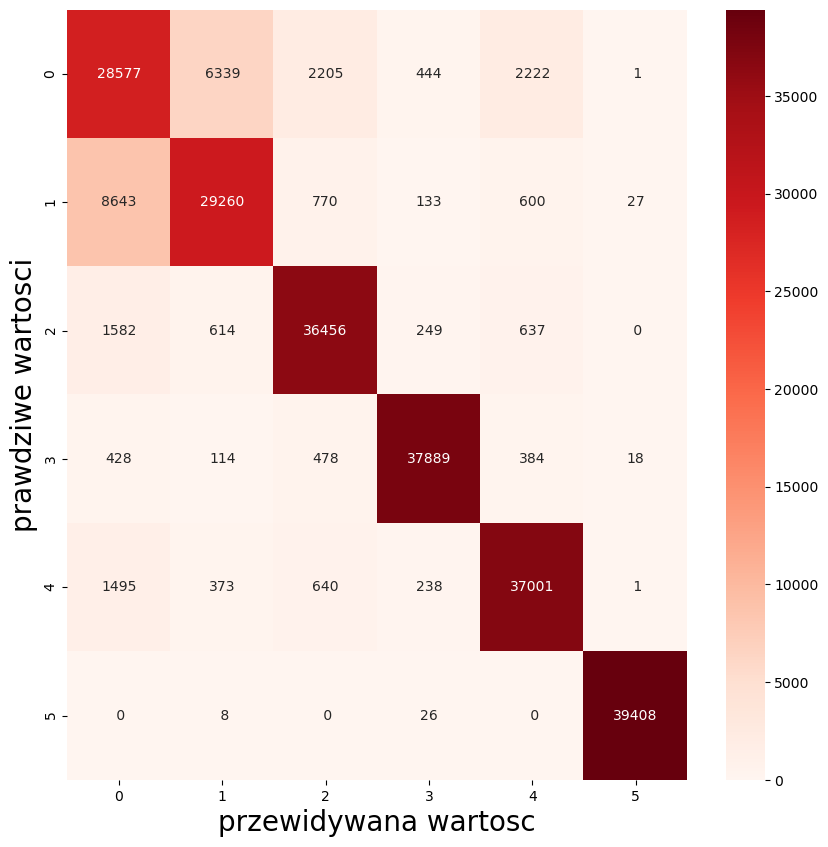

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import nltk
from nltk.corpus import stopwords

#zaczytywanie wartosci z pliku csv

kick = pd.read_csv("ks-projects-201801.csv")
kickDF = pd.DataFrame(kick);
print(kickDF.head(),"\n\n")


#sprawdzanie wartosci pustych
print(kickDF.isnull().sum(),"\n\n")

#usuniecie wartosci pustych
kickDF['usd pledged'].fillna(method = 'pad',inplace = True)
kickDF.dropna(axis=0,inplace=True )

#sprawdzanie wartosci pustych
print(kickDF.isnull().sum(),"\n\n")

#sprawdzanie wartości maksymalnej zbiórki

goal = kickDF['goal']
print(goal.head())
print("\n\nMaksymalna wartosc do zebrania: ",goal.max(),"\n\n")
max = goal.max()
max_row = kickDF.query('goal== goal.max()')
print(max_row[['name','main_category','goal','pledged','state','backers']])

#wyswpietlenie średniej ilosci wartosci zbiórek
print("\n\nŚrednia wartosc do zebrania: ",goal.mean(),"\n\n")

#wyswietlanie procentu ilosci projektów na dana kategorie
category = set(kickDF['main_category'])
category_labels = list(category)

c_category = kickDF['main_category'].value_counts()

category_size = [kickDF['main_category'].value_counts()[5],
              kickDF['main_category'].value_counts()[9],
              kickDF['main_category'].value_counts()[10],
              kickDF['main_category'].value_counts()[8],
              kickDF['main_category'].value_counts()[14],
              kickDF['main_category'].value_counts()[7],
              kickDF['main_category'].value_counts()[11],
              kickDF['main_category'].value_counts()[2],
              kickDF['main_category'].value_counts()[12],
              kickDF['main_category'].value_counts()[6],
              kickDF['main_category'].value_counts()[13],
              kickDF['main_category'].value_counts()[1],
              kickDF['main_category'].value_counts()[4],
              kickDF['main_category'].value_counts()[3],
              kickDF['main_category'].value_counts()[0]
             ]

print(c_category)

fig,ax = plt.subplots(figsize=(13,13))
ax.pie(category_size,labels=category_labels,autopct='%1.1f%%')
ax.axis('equal')
plt.show()

#ukazanie ilosci powodzeń w projektach
list_state = kickDF['state'].value_counts()
print(list_state)
state = set(kickDF['state'])
state_labels = list(state)

state_size = [kickDF['state'].value_counts()[5],
             kickDF['state'].value_counts()[1],
             kickDF['state'].value_counts()[2],
             kickDF['state'].value_counts()[4],
             kickDF['state'].value_counts()[0],
             kickDF['state'].value_counts()[3]]

plt.rcdefaults()
fig, ax= plt.subplots(figsize=(20,5))

# Example data
y_pos = np.arange(len(state_labels))

error = np.random.rand(len(state_labels))

ax.barh(y_pos, state_size, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(state_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('ilosc projektow')

plt.show()

#dekodowanie wartosci

encoder_state= LabelEncoder().fit(kickDF['state'])
kickDF['state'] = encoder_state.transform(kickDF['state'])


encoder_country= LabelEncoder().fit(kickDF['country'])
kickDF['country'] = encoder_country.transform(kickDF['country'])

encoder_category= LabelEncoder().fit(kickDF['category'])
kickDF['category'] = encoder_category.transform(kickDF['category'])

encoder_main_category= LabelEncoder().fit(kickDF['main_category'])
kickDF['main_category'] = encoder_main_category.transform(kickDF['main_category'])

encoder_currency= LabelEncoder().fit(kickDF['currency'])
kickDF['currency'] = encoder_currency.transform(kickDF['currency'])

plt.figure(figsize=(10,5))
corr = kickDF.corr()
sns.heatmap(corr,annot=True)
plt.show()

#normalizacja tekstu, stopwords, operacje na tekscie
nltk.download('stopwords')
stop = stopwords.words('english')

kickDF2 = pd.DataFrame(kick);
name2 = kickDF2['name'].astype(str)

kickDF2['char_count'] = name2.str.len() ## this also includes spaces
print(kickDF2[['name','char_count']].head())

kickDF2['stopwords'] = name2.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(kickDF2[['name','stopwords']].head())

kickDF2['char_count_stopwords'] = kickDF2['stopwords'].str.len() ## this also includes spaces
print(kickDF2[['stopwords','char_count_stopwords']].head())
print('\n\n')
    
    #najczestsze słowa w tytułach zbiórek
    #z wykluczeniem stopwords żeby pokazać tylko znaczące słowa oraz ujednoliceniem do lowercase
    
freqword = kickDF2['stopwords'].str.lower()

print("Najczęściej występujące słowa w tytułach zbiórek\n")
freq = pd.Series(' '.join(freqword).split()).value_counts()[:15]
print(freq)

print('\n\n')

#przygotowywanie danych do modelu

kickDF.set_index(kickDF['name'],inplace=True,drop=True)
kickDF.drop(['ID','name'],axis=1,inplace=True)

X = np.asarray(kickDF.drop(['state','deadline','launched'],axis=1))

y = np.asarray(kickDF['state']).reshape(-1,1)


sm = SMOTE(random_state=0)
x_res,y_res = sm.fit_resample(X=X ,y=y)
count_resample = len(y_res)
print(count_resample)

#podzial danych na treningowe i testowe
x_trening,x_test,y_trening,y_test = train_test_split(x_res,y_res,
                                                 test_size=0.2,
                                                 random_state=0)
print('przestrzen x_trening :'+" "+str(x_trening.shape))
print('rozmiar x_trening :'+" "+str(x_trening.shape[0]))
print('przestrzen x_test :'+" "+str(x_test.shape))
print('rozmiar x_x_test :'+" "+str(x_test.shape[0]))

scale =  StandardScaler().fit(x_trening)
scaled_trening = scale.transform(x_trening)
scaled_test = scale.transform(x_test)

#trenowanie 
DT_clf = DecisionTreeClassifier(random_state=0).fit(scaled_trening , y_trening)
print('\nDokładność naszego modelu do trenowania: '+" "+str(DT_clf.score(scaled_trening
                                                             , y_trening)))
y_predict = DT_clf.predict(scaled_test)
print('\nDokładność naszego modelu:'+" "+str(accuracy_score(y_true=y_test
                                                      , y_pred=y_predict)))
#klasyfikacja modelu
classification_report(y_test , y_predict , output_dict=True )

#ukazanie skutecznosci 
plt.figure(figsize=(10,10))
cf = confusion_matrix(y_test , y_predict)
sns.heatmap(cf,fmt='2d',annot=True,cmap='Reds')
plt.xlabel('przewidywana wartosc',fontsize=20)
plt.ylabel('prawdziwe wartosci',fontsize=20)
plt.show()

